<a href="https://colab.research.google.com/github/Neo-glitch/t.f-2.0-practice/blob/master/Customer_Reviews_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Dataset contains 3000 amazon reviews, star ratings, date of reviews, variant and feedback of various amazon alexa products from Alexa Echo, Echo dots.

* 1= Positive review and 0 = negative review

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


df_alexa = pd.read_csv("/content/drive/MyDrive/datasets/amazon_alexa.tsv", sep="\t")

df_alexa.sample(8)

Mounted at /content/drive


,rating,date,variation,verified_reviews,feedback
1589,5,29-Jul-18,Black Show,Love it,1
1410,4,30-Jul-18,Black Show,"It,is,what it is and than some. Sounds great t...",1
283,5,29-Jul-18,Charcoal Fabric,We love our Echo! We were totally amazed at th...,1
411,5,14-Jul-18,White,everything perfect,1
580,5,10-Jun-18,Black,Worked just as good as the two new Echo Dots i...,1
501,5,24-Jun-18,White,I am happy with the refurbished echo dot. I’ve...,1
1268,5,25-Jul-18,Black Spot,My favorite Echo. A more than adequate replace...,1
1116,5,30-Jul-18,Black Spot,Great for checking in on my son after school w...,1


In [ ]:
df_alexa["verified_reviews"]

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

#### Viz Dataset

In [ ]:
# positive review df
positive = df_alexa[df_alexa["feedback"] == 1]

positive.head(4)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1


In [ ]:
# negative review df
negative = df_alexa[df_alexa["feedback"] == 0]

negative.head(4)

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


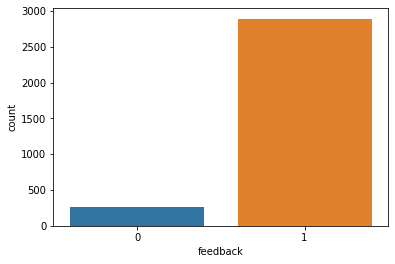

In [ ]:
# plot of diff classes count in feedback col
# n.b : to view if data is skewed
sns.countplot(df_alexa["feedback"], label="Count")

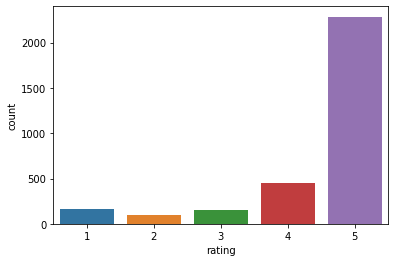

In [ ]:
# alt way of exec method above
sns.countplot(x="rating", data = df_alexa, label="count")

Text(0.5, 0, 'rating')

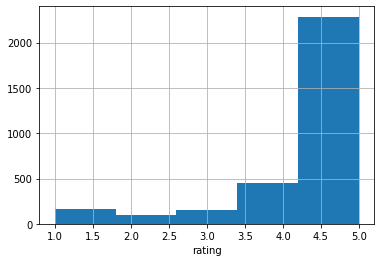

In [ ]:
# hist on rating data
df_alexa["rating"].hist(bins = 5)
plt.xlabel("rating")

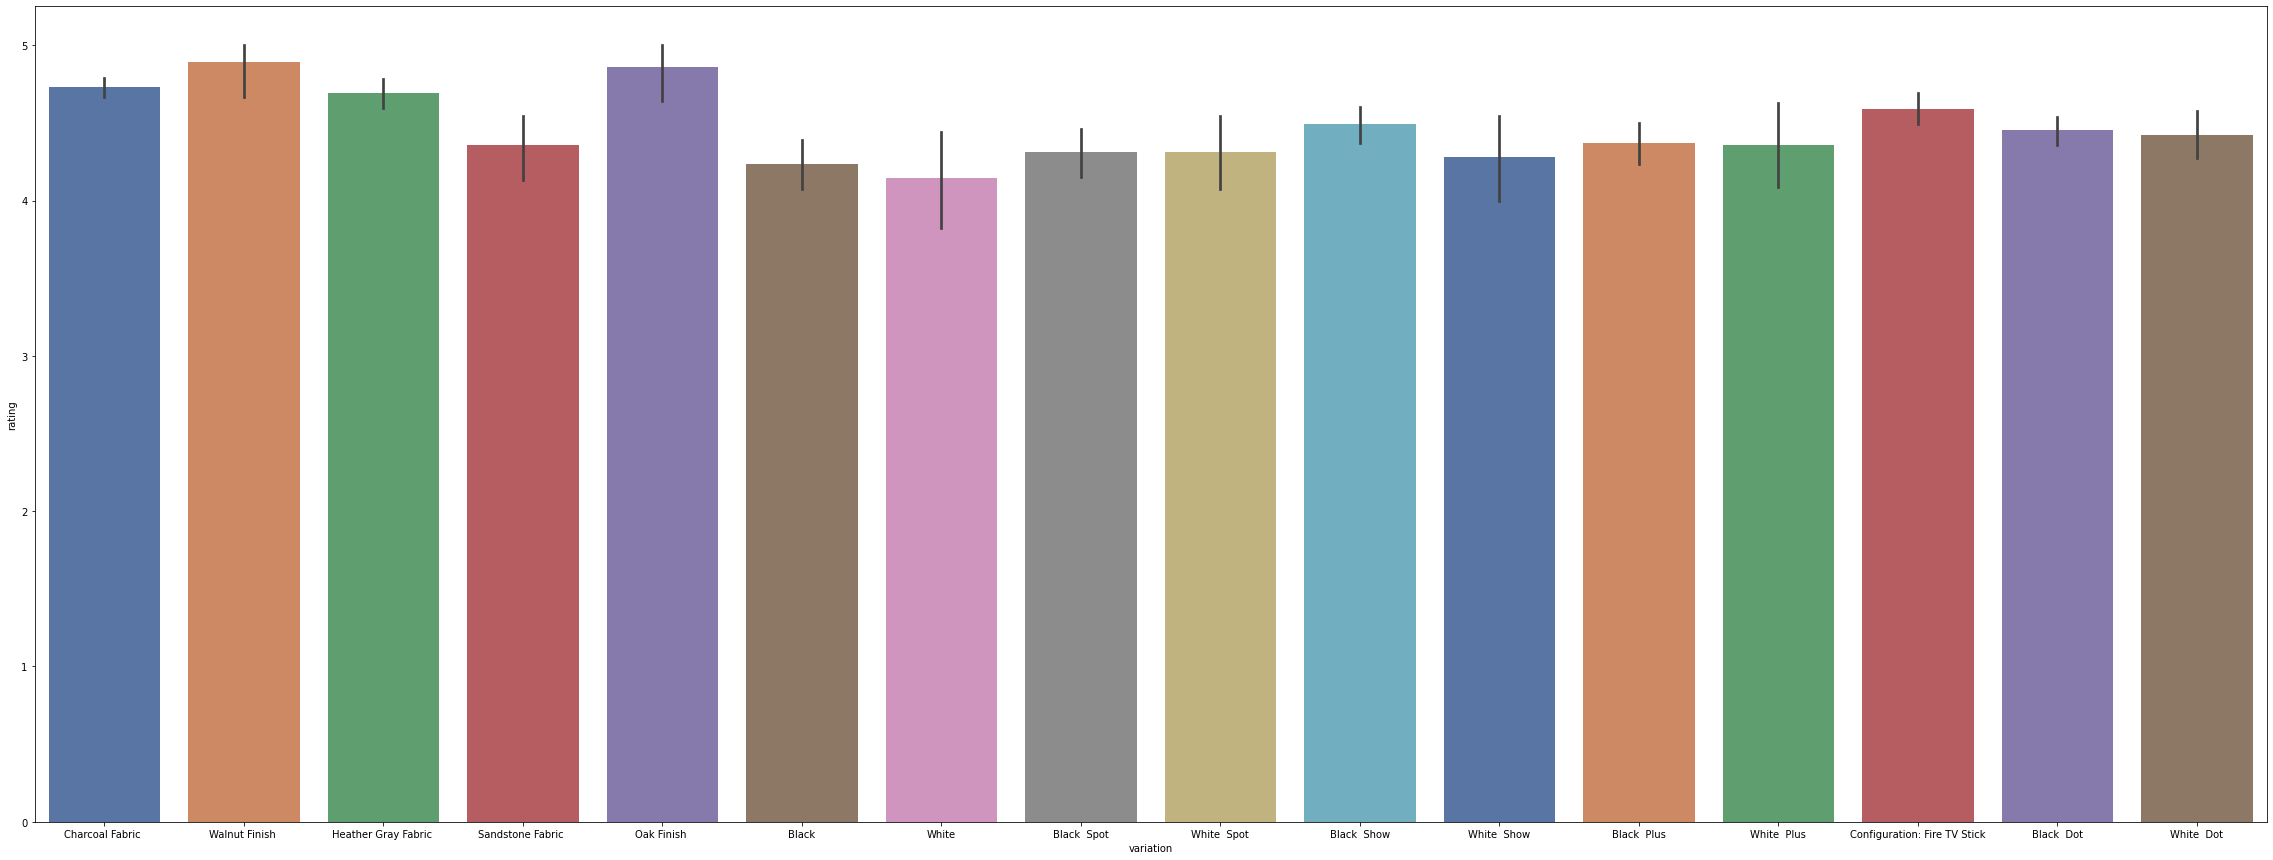

In [ ]:
plt.figure(figsize=(40, 15))
sns.barplot(x="variation", y="rating", data = df_alexa, palette="deep")

### Data Cleanup

In [ ]:
df_alexa.drop(["date", "rating"], axis = 1, inplace =True)

df_alexa.head(3)

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1


In [ ]:
# one hot encode cat data(using class) and drop first col to avoid dummy variable trap
variation_dummies = pd.get_dummies(df_alexa["variation"], drop_first=True)


variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_alexa.drop(["variation"], axis = 1, inplace=True)


df_alexa = pd.concat([df_alexa, variation_dummies], axis =1)

df_alexa.head(3)


,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Count Vect(tokenization) reviews
from sklearn.feature_extraction.text import CountVectorizer


# test doc
sample_data = [
               "This is the first document.",
               "This document is the second document.",
               "And this is the third one.", 
               "Is this the first document?"
]

vectorizer = CountVectorizer()

x = vectorizer.fit_transform(sample_data)

x.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [ ]:
# get the feature index
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [ ]:
vectorizer = CountVectorizer()

alexa_countvect = vectorizer.fit_transform(df_alexa["verified_reviews"])

alexa_countvect.shape

(3150, 4044)

In [ ]:
print(vectorizer.get_feature_names_out())

['00' '000' '07' ... 'zzzz' 'zzzzzzz' 'útil']


In [ ]:
df_alexa.drop(["verified_reviews"], axis = 1, inplace = True)

In [ ]:
# create df for count vectorized reviews
reviews = pd.DataFrame(alexa_countvect.toarray())

In [ ]:
df_alexa = pd.concat([df_alexa, reviews], axis = 1)

df_alexa.head(3)

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = df_alexa.drop(["feedback"], axis = 1)
y = df_alexa["feedback"]

### Train and Evaluate Model

In [ ]:
x.shape, y.shape

((3150, 4059), (3150,))

In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2)

In [ ]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Dense(units = 400, activation = "relu", input_shape = [x_train.shape[1],]),
          tf.keras.layers.Dense(units = 400, activation = "relu"),
          tf.keras.layers.Dense(units = 1, activation = "sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               1624000   
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 dense_2 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1,784,801
Trainable params: 1,784,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
epochs_hist = model.fit(x_train, y_train, epochs = 11)

Epoch 1/11
79/79 [==============================] - 2s 14ms/step - loss: 0.2655 - accuracy: 0.9163
Epoch 2/11
79/79 [==============================] - 1s 14ms/step - loss: 0.0803 - accuracy: 0.9706
Epoch 3/11
79/79 [==============================] - 1s 14ms/step - loss: 0.0280 - accuracy: 0.9921
Epoch 4/11
79/79 [==============================] - 1s 14ms/step - loss: 0.0169 - accuracy: 0.9940
Epoch 5/11
79/79 [==============================] - 1s 14ms/step - loss: 0.0135 - accuracy: 0.9948
Epoch 6/11
79/79 [==============================] - 1s 14ms/step - loss: 0.0120 - accuracy: 0.9948
Epoch 7/11
79/79 [==============================] - 1s 14ms/step - loss: 0.0114 - accuracy: 0.9952
Epoch 8/11
79/79 [==============================] - 1s 14ms/step - loss: 0.0152 - accuracy: 0.9940
Epoch 9/11
79/79 [==============================] - 1s 14ms/step - loss: 0.0125 - accuracy: 0.9944
Epoch 10/11
79/79 [==============================] - 1s 14ms/step - loss: 0.0128 - accuracy: 0.9940
Epoch 11/

In [ ]:
y_pred_train = model.predict(x_train)

y_pred_train

array([[9.9994558e-01],
       [9.9999988e-01],
       [2.5278330e-04],
       ...,
       [1.7282367e-04],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [ ]:
# format classification, if condition satified, set to True else False
y_pred_train = (y_pred_train > 0.5)

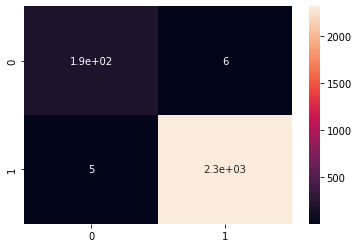

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train)

sns.heatmap(cm, annot=True)

In [ ]:
y_pred_train

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [ True]])

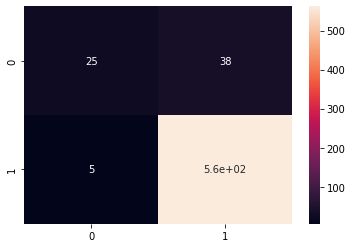

In [ ]:
y_pred_test = model.predict(x_test)

y_pred_test = (y_pred_test > 0.5)

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

Text(0, 0.5, 'Traninig loss')

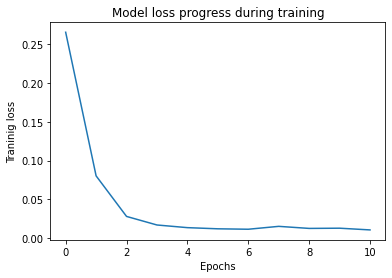

In [ ]:
# plots loss progress

plt.plot(epochs_hist.history["loss"])
plt.title("Model loss progress during training")
plt.xlabel("Epochs")
plt.xticks()
plt.ylabel("Traninig loss")

Text(0, 0.5, 'Training accuracy')

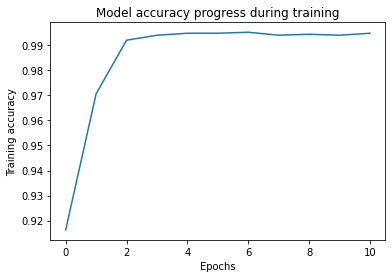

In [ ]:
# plots accuracy progress

plt.plot(epochs_hist.history["accuracy"])
plt.title("Model accuracy progress during training")
plt.xlabel("Epochs")
plt.xticks()
plt.ylabel("Training accuracy")